# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [83]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

lst=list()
for _, p in data.iterrows():
    if p['RM']>=3 and p['RM']<4.5:
        if p['LSTAT']>=29 and p['LSTAT']<35:
            if p['PTRATIO']>=20 and p['PTRATIO']<24:
                lst.append(p['MEDV'])
print len(lst)                
print np.mean(lst)

print np.mean(data['RM'])
print np.std(data['RM'])
print np.mean(data['LSTAT'])
print np.std(data['LSTAT'])
print np.mean(data['PTRATIO'])
print np.std(data['PTRATIO'])
        
#print data['RM']>6
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

1
184800.0
6.24028834356
0.642991297354
12.9396319018
7.07474478483
18.5165644172
2.10910763761
Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [63]:
# TODO: Minimum price of the data
minimum_price = np.amin(prices)

# TODO: Maximum price of the data
maximum_price = np.amax(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

Answer: 

1.Increase 'RM' given 'LSTAT' and 'PTRATIO' remain unchanged
Based on common knowledge/intuition in most cases prices of houses in "same neighbourhood" usually increase with increase in number of rooms. Therefore increasing RM= avg number of rooms in a house should increase the value of MEDV price of house).

2. Increase 'LSTAT' given 'RM' and 'PTRATIO' remain unchanged
Increase in LSTAT should decrease the MEDV value. Lower class homeowners will generally have a lower purchasing power/affordability. Therefore increase of LSTAT will indicate increase in low cost houses in the neighbourhood, inorder for lower class families to afford those.

3. Increase 'PTRATIO' given 'RM' and 'LSTAT' remain unchanged
Schools which have lower students to teacher ratio are generally considered good, as this means the teacher  can give more individual attention to each student. Most families therefore would like to have such schools in their neighborhood. Thus it can be guessed, schools with lower the PTRATIO will be in high demand and as results houses in such neighborhood will too be in high demand and as result more pricy.

However with increase in the PTRATIO, the demand for houses in that neighborhood will also reduce thus resulting in decrease in avg housing price (MEDV)

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 always fails to predict the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. *A model can be given a negative R<sup>2</sup> as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.*

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [64]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score


def performance_metric(y_true, y_predict):
    
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [65]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer: 
Model has a coefficient of determination, R^2, of 0.923.
Values for R^2 prediction range between 0-1, with 1 means model is able to perfectly predict the output. Since for above given dataset, with R^2 we get a prediction score of 0.923 which is close to 1, we can say this model did a good job capturing target variable.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [66]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split 

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state=20)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: Training dataset is used to train/fit features of a dataset(using majority data)so that it predicts correct output.We try to get a good prediction by minimizing mse based on the training data.
This can be achived by various ways, increasing data in training set, increasing or reducing algorithm complexity.

Testing dataset is used to check if the machine learning model developed using the training data is equally good at predicting output/minimizing(mse) on new data.

If we do not split data, we may create a complex algorithm using many feautures which may fit the given data perfectly, however does not generalize well/predict correct output when new data is added.
Thus there is a scare of overfitting if machine learning algo is used on the whole data without splitting.

Thus best algorithm is one which can get a low mse for both training and testing data.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

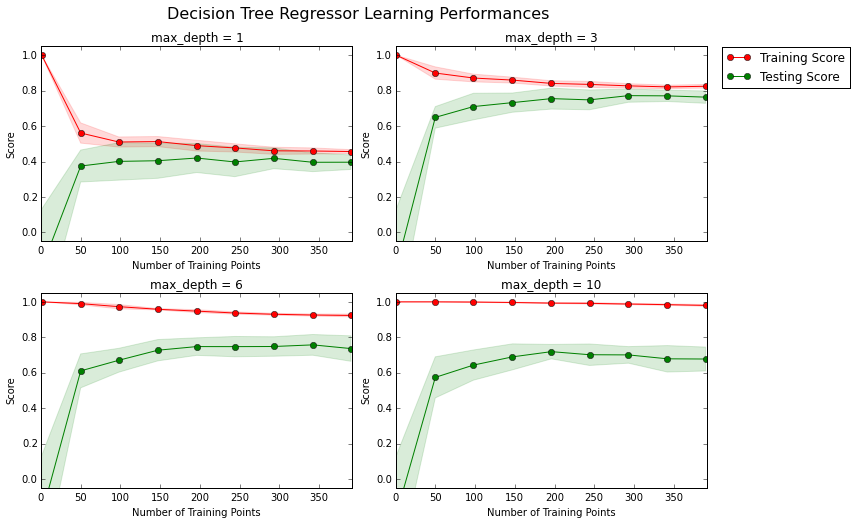

In [67]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer:
Analysis for Max_depth=3:

From the given graphs it can be observed that at max_depth=3 the machine learning model gives the best results. Among all the given graphs we can observe that for max_depth=3 both training data and testing data results converge around 0.8 score (with 1 being the best score) with minimum shaded area for both training & testing learning curves combined. Thus we can conclude the machine learning algorithm is performing equally well on testing data as it does on training data. 
Machine learning algorthim's score increases with amount of data. However if more amount of data is added to training dataset, as in case of max_depth=6 and max_depth=7, we see althought the learning curve score for training data is higher than .8/closer to 1 and also is sharper compared to max_depth=3. The fit obtained from their corresponding testing data sets suffer due to less data and thus result in a learning curve which is more uncertain and had a lower scores. For max_depth=6 and max_depth=7(as training data increases) the alogrithm is unable to generalize well and suffer from higher variance.

Thus it can be seen, there is a tradeoff between training dataset & testing dataset for the amount of data.
Best solution is to split the data such that both training and testing learning curves converge at a score as close to 1 as possible.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

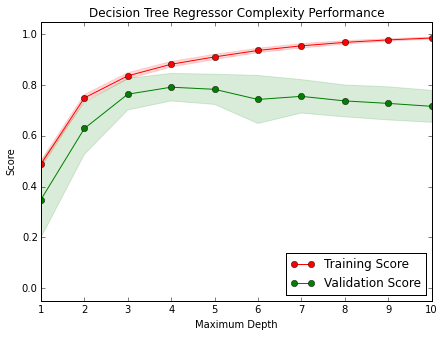

In [68]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer:
For max_depth=1, the model suffers from High Bias:

From the learning curves for max_depth=1 we see that both training and testing curve converge at low score (about .4) at around 200 data points and the score does not improve even with more data.
This tells that the machine learning model was too simple (less features used or a plain linear model was used) and thus could not fit the training data more accurately and similar poor data prediction/score is observed with testing data.

For max_depth=10, the model suffers High Variance:

From the Complexity Performance graph we can observe, as the complexity of the ML model increases (for a fixed set of training and test data) while the training curve score improves towards 1, but the test curve score starts droping after max_depth 4. This indicates that as complexity of ML model is increased beyond max_depth 4, the ML model is overfitting the training data and as a result unable to generalize well with the test data.

Thus as seen from Complexity Performance graph, learning curves and test curves are diverging as the ML model complexity is increased,as there is not enough data to properly take into account the increased complexity. As a result s model is overfitting training data and thus suffering from High Variance.


### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer:

Max_depth between 3 & 4 will best generalizes unseen data.
As seen from Learning performance graphs,for Max_depth =3, both training and testing learning curves converge at a fairly high score around (.8).
At max_depth=4, training and testing learning curves are not as converged as in case of Max_depth=3, however for max_depth 4 both learning and testing curve show slight increase in score compared to max_depth 3.

Also from Complexity Performance graph we observe, both training and testing curves are most converged at max_depth =3. Below max_depth 3 model suffers from High Bais while as max_depth increases above 3, model starts to suffer from High Variance.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: 
In GridSearchCV we have a set of models which differ from each other in their parameter values. We then train each of the models and evaluate it using cross-validation. The model (set of parameters) which performs best with the cross-validation is selected.

Guessing the best set of parameter values is'nt the best way to train. GridSearchCV provides a way to systematically work through multiple combinations of parameter tunes and then select the best one which provides best cross-validation results.
Eample:

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
A 'grid' of all the following parameter combinations of values for (kernel, C) are automatically generated:

('rbf', 1)	('rbf', 10)
('linear', 1)	('linear', 10)

svr = svm.SVC()
clf = grid_search.GridSearchCV(svr, parameters, cv=5)

Then each parameter set of (kernel,C) is used to train an SVM, and the performance is then assessed using cross-validation.

clf.fit(X_train, y_train)

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer:
In K-fold cross-validation, Training Dataset (TD) is split into K equal smaller datatsets. At a given time TD-TD/K data points are used to in the training algorithm and remaing TD/K data points used for testing. This experiment is run 'K' times each time with different training set generating a new model which is cross-validated against corresponding test dataset.The performance measure reported by K-fold cross-validation is then the average of the values computed in the loop. 

In Grid search we have a set of models which differ from each other in their parameter values. If we don't use cross-validation set to verify training results, it is possible that a particular set of parameters might fit perfectly for a given training dataset, leading us to select that paramater set in our ML algorithm, however it might fail to generalize when tried against new data in test data set.
To avoid this overfit/high vairance problem it's best to use K-fold cross-validation on the training dataset.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [69]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn import grid_search
from sklearn.metrics import make_scorer

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = grid_search.GridSearchCV(regressor,params,cv=cv_sets,scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [70]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: 
Parameter 'max_depth' is 4 for the optimal model.

In Question 6,based on Complexity Curve graph I had guessed for optimal max_depth to be between 3-4.
Optimal max_depth obtained from running decision tree regression on training data is 4, so it's in the same range.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [98]:
lst=list()
for _, p in data.iterrows():
    if p['RM']>=3.5 and p['RM']<5:
        if p['LSTAT']>=30 and p['LSTAT']<32:
            if p['PTRATIO']>=20 and p['PTRATIO']<22:
                lst.append(p['MEDV'])
print len(lst)                
print np.mean(lst)

print np.mean(data['RM'])
print np.std(data['RM'])
print np.mean(data['LSTAT'])
print np.std(data['LSTAT'])
print np.mean(data['PTRATIO'])
print np.std(data['PTRATIO'])


print 'Max LSTAT value = ', np.amax(data['LSTAT'])
print 'Max PTRATIO value = ',np.amax(data['PTRATIO'])
print 'Min RM value = ',np.amin(data['RM'])
        


# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

2
199500.0
6.24028834356
0.642991297354
12.9396319018
7.07474478483
18.5165644172
2.10910763761
Max LSTAT value =  37.97
Max PTRATIO value =  22.0
Min RM value =  3.561
Predicted selling price for Client 1's home: $306,337.50
Predicted selling price for Client 2's home: $224,342.55
Predicted selling price for Client 3's home: $930,490.91


**Answer: 

Predicted selling price for Client 1's home: $306,337.50 (seems resonable)
For Client1 RM=5, LSTAT=17 and PTRATIO=15
These values indicate the selling price should be between mean & (mean - 1std) range,which comes about
454,342.94 - 165,171.13= $289,171.81
Thus selling price for Client1 should be between ($289,171.81 ,$454,342.94) leaning towards the lower limit.
Predicted selling price falls within this range.


Predicted selling price for Client 2's home: $224,342.55 (seems higher)
For Client2 RM=4, LSTAT=32 and PTRATIO=22
These values fall on the extreme lower side. Performing some detailed analysis on the lower values I get
lst=list()
for _, p in data.iterrows():
    if p['RM']>=3.5 and p['RM']<5: 
        if p['LSTAT']>=30 and p['LSTAT']<32:
            if p['PTRATIO']>=20 and p['PTRATIO']<22:
                lst.append(p['MEDV'])
print len(lst)                
print np.mean(lst)

2
199500.

The mean price of  $199500.0 is a bit higher than the predicted value of $224,342.55
Indicating that the regression model is predicting a bit higher price for Client2. This could be due to less datais is available for very low values.



Predicted selling price for Client 3's home: $930,490.91 (seems resonable)
For Client3 RM=8, LSTAT=3 and PTRATIO=12
These values indicate the selling price should be between (mean + 2std) & (mean + 3std) range,leaning towards the higher limit, which comes about 454,342.94+3*165,171.13= $949,855

Price predicted by the algorithm is $930,490.91 which is close to above value.


### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [99]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: 
Above model is cannot be used in real-world setting for the following:
1. Data collected in 1978 cannot be considered very relavant in 2016 although the price values have been multipled to take inflation into account. Current job market,Average income, economy, family trends play a very important role in predicting house value.
2. Also features present in data are not at all sufficient for proper prediction.
Some other important features like Built Year, Sq feet Area, $/Sq feet Area, View, Parking, Equipments (AC, Heater,Fridge et), Location, Number of bathrooms, number of rooms, crime-rate, public transport, job-market, renovation etc are some of the features that can help get finer prediction.
3. Current model needs much more training and testing data to comeup with proper predictions. As observed with vs.PredictTrials(features, prices, fit_model, client_data), sensitivty of the model varies quiet a bit with a price ranging: $69,044.61 for various training & testing data set.
So current model is not robust enough to make consistent predictions within a resonable range.
4. No data collected in urban city like Bostan will not be applicable to a rural city as current job market, economy, family trends,Average income, Location, tax policies etc are some of the key feautures which can have a major impact in the housing price market. Also basic lifestyle and needs of city people are different from that of rural.As a result some features will have higher impact in house price in rular area compared to an urban city and vice-versa. Also some additional features might be required for predicting house price in rural area such as( access to main road, water availability, weather conditions, occupation..etc which might not be as important when predicting price of house in a city.